### ***Initializing and Importing Packages***

In [1]:
using Plots, DataFrames, StatsBase, Plots.PlotMeasures, LaTeXStrings, CSV, JLD, ProgressMeter, Dates

DataDir = "../Data/"
FigsDir = "../Figs/"

include("Mods.jl")

theme(:dark)
Plots.default(titlefontsize=12, tickfontsize=10, labelfontsize=12, legendfontsize=9,
    fontfamily="Computer Modern", frame=:box, label=nothing)

In [2]:

StatsMods.GetData("BTC"; Period="5MIN", StartDate=DateTime(2022, 02, 1), api_key=API_Key)
StatsMods.GetData("ETH"; Period="5MIN", StartDate=DateTime(2022, 02, 1), api_key=API_Key)
StatsMods.GetData("XRP"; Period="5MIN", StartDate=DateTime(2022, 02, 1), api_key=API_Key)
StatsMods.GetData("SOL"; Period="5MIN", StartDate=DateTime(2022, 02, 1), api_key=API_Key)
StatsMods.GetData("ADA"; Period="5MIN", StartDate=DateTime(2022, 02, 1), api_key=API_Key)

382150

In [2]:
DataBTC = StatsMods.LoadData("BTC");
DataETH = StatsMods.LoadData("ETH");
DataXRP = StatsMods.LoadData("XRP");
DataSOL = StatsMods.LoadData("SOL");
DataADA = StatsMods.LoadData("ADA");

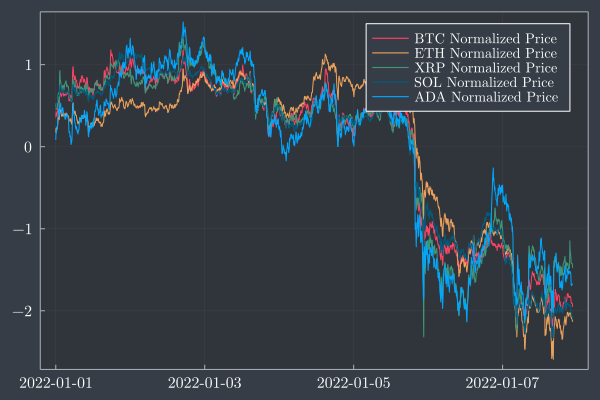

In [3]:
plot(DataBTC[4], DataBTC[3], label ="BTC Normalized Price")
plot!(DataETH[4], DataETH[3], label="ETH Normalized Price")
plot!(DataXRP[4], DataXRP[3], label="XRP Normalized Price")
plot!(DataSOL[4], DataSOL[3], label="SOL Normalized Price")
plot!(DataADA[4], DataADA[3], label="ADA Normalized Price")

In [61]:
LMT = 5
ND = length(DataBTC[3])
BTCMEANDATA = [mean(DataBTC[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
ETHMEANDATA = [mean(DataETH[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
XRPMEANDATA = [mean(DataXRP[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
SOLMEANDATA = [mean(DataSOL[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
ADAMEANDATA = [mean(DataADA[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];

In [44]:
function CheckSTD(LMT)
    BTCSTDDATA = [std(DataBTC[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1]
    ETHSTDDATA = [std(DataETH[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1]
    XRPSTDDATA = [std(DataXRP[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1]
    SOLSTDDATA = [std(DataSOL[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1]
    ADASTDDATA = [std(DataADA[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1]

    return mean.([BTCSTDDATA,
        ETHSTDDATA,
        XRPSTDDATA,
        SOLSTDDATA,
        ADASTDDATA])
end

CheckSTD (generic function with 1 method)

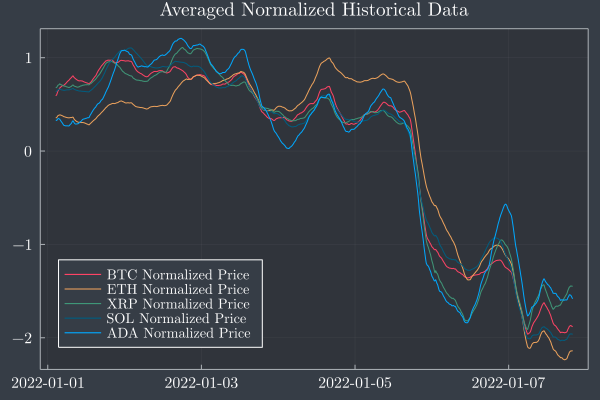

In [56]:
plot(DataBTC[4][LMT+1:ND-LMT-1], BTCMEANDATA, label="BTC Normalized Price")
plot!(DataETH[4][LMT+1:ND-LMT-1], ETHMEANDATA, label="ETH Normalized Price")
plot!(DataXRP[4][LMT+1:ND-LMT-1], XRPMEANDATA, label="XRP Normalized Price")
plot!(DataSOL[4][LMT+1:ND-LMT-1], SOLMEANDATA, label="SOL Normalized Price")
plot!(DataADA[4][LMT+1:ND-LMT-1], ADAMEANDATA, label="ADA Normalized Price")
plot!(title="Averaged Normalized Historical Data", legend = 200)

In [9]:
CalculateDelayedCor(MainCoin::Vector{Float64}, DependentCoin::Vector{Float64}, τ::Int; Δt=30) = cor(MainCoin[end-Δt:end], DependentCoin[end-Δt-τ:end-τ])
CalculateDelayedCov(MainCoin::Vector{Float64}, DependentCoin::Vector{Float64}, τ::Int; Δt=30) = cov(MainCoin[end-Δt:end], DependentCoin[end-Δt-τ:end-τ])

CalculateDelayedCov (generic function with 1 method)

In [ ]:
[CalculateDelayedCor(BTCMEANDATA, ETHMEANDATA, τ) for τ ∈ 0:EndTime]

In [50]:
LMT = 30
ND = length(DataBTC[3])
BTCMEANDATA = [mean(DataBTC[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
ETHMEANDATA = [mean(DataETH[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
XRPMEANDATA = [mean(DataXRP[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
SOLMEANDATA = [mean(DataSOL[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
ADAMEANDATA = [mean(DataADA[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];

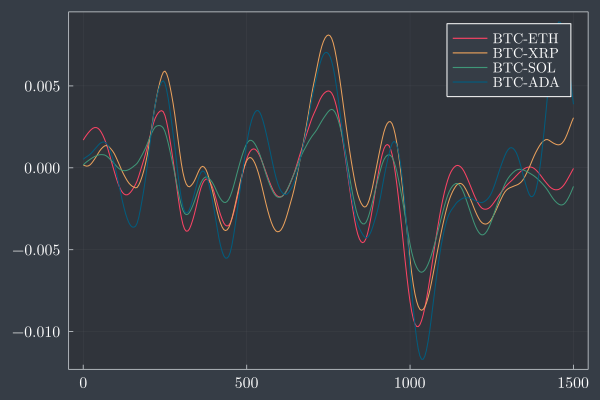

In [62]:
EndTime = 300
MinSpan = 0:5:5*EndTime
plot(MinSpan, [CalculateDelayedCov(BTCMEANDATA, ETHMEANDATA, τ) for τ ∈ 0:EndTime], label = "BTC-ETH")
plot!(MinSpan, [CalculateDelayedCov(BTCMEANDATA, XRPMEANDATA, τ) for τ ∈ 0:EndTime], label = "BTC-XRP")
plot!(MinSpan, [CalculateDelayedCov(BTCMEANDATA, SOLMEANDATA, τ) for τ ∈ 0:EndTime], label = "BTC-SOL")
plot!(MinSpan, [CalculateDelayedCov(BTCMEANDATA, ADAMEANDATA, τ) for τ ∈ 0:EndTime], label = "BTC-ADA")

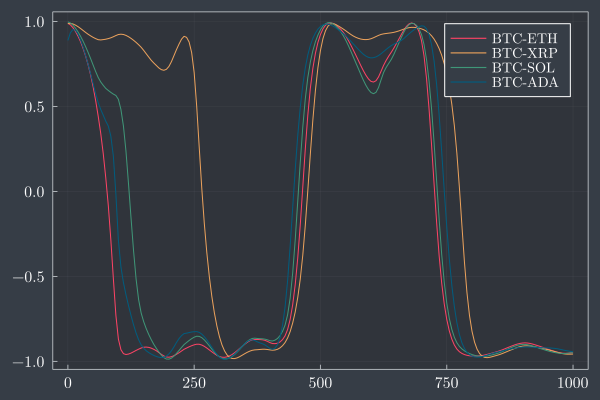

In [52]:
EndTime = 200
MinSpan = 0:5:5*EndTime
plot(MinSpan, [CalculateDelayedCor(BTCMEANDATA, ETHMEANDATA, τ) for τ ∈ 0:EndTime], label = "BTC-ETH")
plot!(MinSpan, [CalculateDelayedCor(BTCMEANDATA, XRPMEANDATA, τ) for τ ∈ 0:EndTime], label = "BTC-XRP")
plot!(MinSpan, [CalculateDelayedCor(BTCMEANDATA, SOLMEANDATA, τ) for τ ∈ 0:EndTime], label = "BTC-SOL")
plot!(MinSpan, [CalculateDelayedCor(BTCMEANDATA, ADAMEANDATA, τ) for τ ∈ 0:EndTime], label = "BTC-ADA")